In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
#from vaderSentiment import SentimentIntensityAnalyzer

In [2]:
cnn_news=pd.read_csv("CNN_CLEANED.csv",encoding = 'unicode_escape')

In [3]:
cnn_news

,title,description,link,publish_date
0,Trump and the GOP were left to explain why the...,"Democrats were celebrating Tuesday night, whil...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Bh...,"Wed, 06 Nov 2019 14:17:50 GMT"
1,"Tuesday's elections in Kentucky, Virginia and ...",NaN,http://rss.cnn.com/~r/rss/cnn_topstories/~3/oj...,NaN
2,Analysis: Why Trump couldn't save a GOP candid...,Kentucky Gov. Matt Bevin isn't a near-certain ...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/gn...,"Wed, 06 Nov 2019 13:28:32 GMT"
3,Tate Reeves: This victory belongs to you,"In the Mississippi governor race, CNN projects...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Fz...,"Wed, 06 Nov 2019 12:08:46 GMT"
4,Analysis: Why Mitch McConnell is smiling today,In the wake of Kentucky Republican Gov. Matt B...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/NQ...,"Wed, 06 Nov 2019 14:26:22 GMT"
...,...,...,...,...
203,Artists skytype over ICE detention centers,"This Independence Day Weekend, 80 artists are ...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/wy...,NaN
204,Photos capture the magic of everyday life in A...,When photographer William Eggleston arrived in...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/gx...,NaN
205,The drama that changed TV history 30 years ago,"Before Netflix, before sagas like ""Game of Thr...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Hd...,NaN
206,Halle Berry and the erasure of Black trans peo...,Representation in Hollywood isn't just about r...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/BC...,NaN


In [4]:
cnn_news.columns

Index(['title', 'description', 'link', 'publish_date'], dtype='object')

In [5]:
df = pd.DataFrame(cnn_news)

In [6]:
df['title'] = df['title'].astype(str)

In [7]:
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['title'][8]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"dramatic reversal splinters trump's impeachment defense"

In [9]:
st = PorterStemmer()
df['title'] = df['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['title'][2]

'analysis: trump save gop candid kentucki'

In [10]:
## Define a function which can be applied to calculate the score for the whole dataset
 
def senti(x):
    return TextBlob(x).sentiment

def polarity(x):
    return TextBlob(x).sentiment[0]

df['polarity'] = df['title'].apply(polarity)
 
df['senti_score'] = df['title'].apply(senti)
 
df.senti_score.head()
df.head(10)

,title,description,link,publish_date,polarity,senti_score
0,trump gop left explain behind one reddest stat...,"Democrats were celebrating Tuesday night, whil...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Bh...,"Wed, 06 Nov 2019 14:17:50 GMT",-0.2,"(-0.2, 0.35)"
1,"tuesday' elect kentucky, virginia mississippi",NaN,http://rss.cnn.com/~r/rss/cnn_topstories/~3/oj...,NaN,0.8,"(0.8, 0.9)"
2,analysis: trump save gop candid kentucki,Kentucky Gov. Matt Bevin isn't a near-certain ...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/gn...,"Wed, 06 Nov 2019 13:28:32 GMT",0.6,"(0.6, 0.8)"
3,tate reeves: victori belong,"In the Mississippi governor race, CNN projects...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Fz...,"Wed, 06 Nov 2019 12:08:46 GMT",0.0,"(0.0, 0.0)"
4,analysis: mitch mcconnel smile today,In the wake of Kentucky Republican Gov. Matt B...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/NQ...,"Wed, 06 Nov 2019 14:26:22 GMT",0.3,"(0.3, 0.1)"
5,bloomberg-fund gun-control group help turn vir...,"More than $166,000 in contributions, mailings ...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/dX...,"Wed, 06 Nov 2019 13:10:30 GMT",0.0,"(0.0, 0.1)"
6,watch trump' kentucki predict day elect,President Donald Trump makes a prediction at a...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/HC...,"Wed, 06 Nov 2019 11:29:18 GMT",0.8,"(0.8, 0.9)"
7,opinion: frighten signal republican,Republicans have good reason to be unhappy wit...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/Xc...,"Wed, 06 Nov 2019 05:24:17 GMT",0.0,"(0.0, 0.0)"
8,dramat revers splinter trump' impeach defens, Live updates: How did the White House respon...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/G-...,"Wed, 06 Nov 2019 13:12:05 GMT",0.0,"(0.0, 0.0)"
9,impeach wit arriv capitol hill testimoni,NaN,http://rss.cnn.com/~r/rss/cnn_topstories/~3/vB...,"Wed, 06 Nov 2019 13:33:09 GMT",0.0,"(0.0, 0.0)"


In [11]:
df.shape

(208, 6)

In [12]:
#from vaderSentiment.vaderSentiment import sentiment as vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    return analyser.polarity_scores(sentence)['compound']

results = []

df['Compound'] = df['title'].apply(sentiment_analyzer_scores)
 
df.head()

,title,description,link,publish_date,polarity,senti_score,Compound
0,trump gop left explain behind one reddest stat...,"Democrats were celebrating Tuesday night, whil...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Bh...,"Wed, 06 Nov 2019 14:17:50 GMT",-0.2,"(-0.2, 0.35)",0.0000
1,"tuesday' elect kentucky, virginia mississippi",NaN,http://rss.cnn.com/~r/rss/cnn_topstories/~3/oj...,NaN,0.8,"(0.8, 0.9)",0.0000
2,analysis: trump save gop candid kentucki,Kentucky Gov. Matt Bevin isn't a near-certain ...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/gn...,"Wed, 06 Nov 2019 13:28:32 GMT",0.6,"(0.6, 0.8)",0.4939
3,tate reeves: victori belong,"In the Mississippi governor race, CNN projects...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Fz...,"Wed, 06 Nov 2019 12:08:46 GMT",0.0,"(0.0, 0.0)",0.0000
4,analysis: mitch mcconnel smile today,In the wake of Kentucky Republican Gov. Matt B...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/NQ...,"Wed, 06 Nov 2019 14:26:22 GMT",0.3,"(0.3, 0.1)",0.3612


In [13]:
df['score_sentiment'] = "Neutral"
df.loc[df['Compound'] > 0.0, 'score_sentiment'] = "Positive"
df.loc[df['Compound'] < -0.0, 'score_sentiment'] = "Negative"
#df.loc[df['Compound'] = 0.0, 'score_sentiment'] = "Neutral"


df.head(50)



,title,description,link,publish_date,polarity,senti_score,Compound,score_sentiment
0,trump gop left explain behind one reddest stat...,"Democrats were celebrating Tuesday night, whil...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Bh...,"Wed, 06 Nov 2019 14:17:50 GMT",-0.200000,"(-0.2, 0.35)",0.0000,Neutral
1,"tuesday' elect kentucky, virginia mississippi",NaN,http://rss.cnn.com/~r/rss/cnn_topstories/~3/oj...,NaN,0.800000,"(0.8, 0.9)",0.0000,Neutral
2,analysis: trump save gop candid kentucki,Kentucky Gov. Matt Bevin isn't a near-certain ...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/gn...,"Wed, 06 Nov 2019 13:28:32 GMT",0.600000,"(0.6, 0.8)",0.4939,Positive
3,tate reeves: victori belong,"In the Mississippi governor race, CNN projects...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/Fz...,"Wed, 06 Nov 2019 12:08:46 GMT",0.000000,"(0.0, 0.0)",0.0000,Neutral
4,analysis: mitch mcconnel smile today,In the wake of Kentucky Republican Gov. Matt B...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/NQ...,"Wed, 06 Nov 2019 14:26:22 GMT",0.300000,"(0.3, 0.1)",0.3612,Positive
5,bloomberg-fund gun-control group help turn vir...,"More than $166,000 in contributions, mailings ...",http://rss.cnn.com/~r/rss/cnn_topstories/~3/dX...,"Wed, 06 Nov 2019 13:10:30 GMT",0.000000,"(0.0, 0.1)",0.4019,Positive
6,watch trump' kentucki predict day elect,President Donald Trump makes a prediction at a...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/HC...,"Wed, 06 Nov 2019 11:29:18 GMT",0.800000,"(0.8, 0.9)",0.0000,Neutral
7,opinion: frighten signal republican,Republicans have good reason to be unhappy wit...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/Xc...,"Wed, 06 Nov 2019 05:24:17 GMT",0.000000,"(0.0, 0.0)",-0.3400,Negative
8,dramat revers splinter trump' impeach defens, Live updates: How did the White House respon...,http://rss.cnn.com/~r/rss/cnn_topstories/~3/G-...,"Wed, 06 Nov 2019 13:12:05 GMT",0.000000,"(0.0, 0.0)",0.0000,Neutral
9,impeach wit arriv capitol hill testimoni,NaN,http://rss.cnn.com/~r/rss/cnn_topstories/~3/vB...,"Wed, 06 Nov 2019 13:33:09 GMT",0.000000,"(0.0, 0.0)",0.0000,Neutral


In [14]:
  df.score_sentiment.head(50)

0      Neutral
1      Neutral
2     Positive
3      Neutral
4     Positive
5     Positive
6      Neutral
7     Negative
8      Neutral
9      Neutral
10    Positive
11    Negative
12     Neutral
13    Positive
14     Neutral
15    Negative
16     Neutral
17    Negative
18    Negative
19    Negative
20    Negative
21    Positive
22     Neutral
23    Positive
24     Neutral
25     Neutral
26    Negative
27    Positive
28     Neutral
29    Positive
30    Negative
31     Neutral
32     Neutral
33     Neutral
34     Neutral
35    Negative
36     Neutral
37     Neutral
38    Negative
39    Positive
40    Negative
41    Negative
42     Neutral
43     Neutral
44     Neutral
45     Neutral
46    Negative
47    Negative
48    Negative
49     Neutral
Name: score_sentiment, dtype: object

In [15]:
df.to_csv('cnn_title_sentiments.csv', mode='a', encoding='utf-8', index=False)

In [16]:
dataframe=df

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens
filter1= dataframe['score_sentiment']=="Positive"
pos=dataframe[filter1]
pos_lines = pos["title"].tolist()

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

#pos_lines.remove('charg', '8', 'group', 'testimoni')

#pos_lines.remove('charg')
pos_freq.most_common(20)

[('trump', 6),
 ('analysis', 4),
 ('school', 4),
 ('virginia', 3),
 ('opinion', 3),
 ('card', 3),
 ('charg', 3),
 ('0', 3),
 ('interest', 3),
 ('2021', 3),
 ('attorney', 3),
 ('say', 3),
 ('group', 2),
 ('testimoni', 2),
 ('win', 2),
 ('back', 2),
 ('plan', 2),
 ('play', 2),
 ('target', 2),
 ('white', 2)]

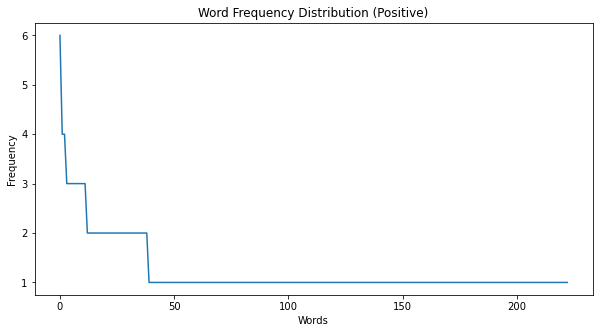

In [18]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [19]:

dataframe2=df

filter2= dataframe2['score_sentiment']=="Negative"
neg=dataframe2[filter2]

neg_lines = neg["title"].tolist()

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 6),
 ('die', 5),
 ('arrest', 5),
 ('year', 5),
 ('old', 5),
 ('famili', 4),
 ('attack', 4),
 ('analysis', 4),
 ('kill', 4),
 ('former', 3),
 ('black', 3),
 ('destroy', 3),
 ('say', 3),
 ('death', 3),
 ('victim', 3),
 ('strike', 3),
 ('suspect', 3),
 ('get', 3),
 ('man', 3),
 ('court', 3)]

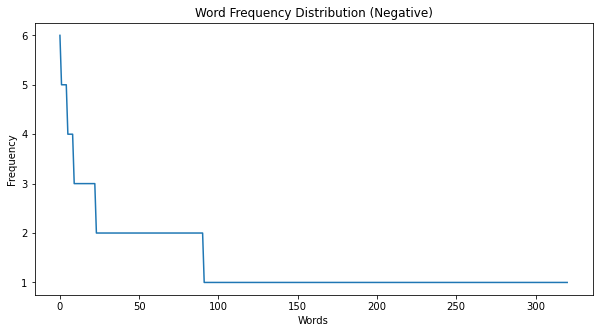

In [20]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

In [21]:

dataframe3=df

filter3= dataframe2['score_sentiment']=="Neutral"
neu=dataframe3[filter3]

neu_lines = neu["title"].tolist()

neu_tokens = process_text(neu_lines)
neu_freq = nltk.FreqDist(neu_tokens)

neu_freq.most_common(20)

[('trump', 18),
 ('say', 7),
 ('covid', 7),
 ('impeach', 6),
 ('new', 6),
 ('us', 6),
 ('one', 5),
 ('elect', 5),
 ('opinion', 5),
 ('year', 5),
 ('first', 5),
 ('19', 5),
 ('test', 4),
 ('7', 4),
 ('could', 4),
 ('school', 4),
 ('get', 4),
 ('state', 3),
 ('day', 3),
 ('life', 3)]

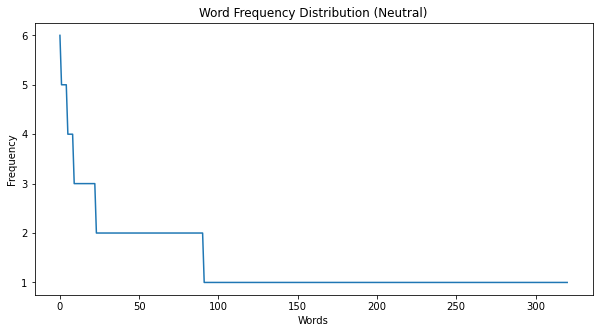

In [22]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Neutral)")
plt.show()